In [8]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposer import FlowDecomposition

In [9]:
import os
import glob
import pandas as pd
import re

precomputed_dir = '/Users/iaroslav/Data/data_precomputed_compressed/'
file_paths = glob.glob(os.path.join(precomputed_dir, '*.npz'))

# Create a DataFrame.
df = pd.DataFrame(file_paths, columns=['file_path'])

# Function to extract the bird name (alphabetical part plus number) before the dash.
def extract_bird_name(path):
    file_name = path.split('/')[-1]
    # Split by '-' and take the first part.
    return file_name.split('-')[0]

# Create a new column 'bird' with the extracted name.
df['bird'] = df['file_path'].apply(extract_bird_name)

# Group by the 'bird' column and aggregate file paths into a list.
grouped = df.groupby('bird')['file_path'].apply(list).reset_index()
grouped.set_index('bird', inplace=True)

In [10]:
X = []
for file_path in grouped.loc["blue621"].to_numpy()[0]:  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


In [11]:
X = []
for file_path in np.concatenate(np.concatenate(grouped.loc[grouped.index[700:710]].to_numpy())):  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


In [ ]:
init_params = {
    "input_dim": X.shape[1], 
    "proj_dim": 5,
    "n_components": 2,        
    "num_delays": 0,
    "delay_step": 20,
    "subtract_autocorr": False,
    "device": "cpu",
    "optimizer": "Adagrad",
    "learning_rate": 0.1,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_size": 300,
    "library_size": 1600,
    "exclusion_rad": 30,
    "time_intv": 50,
    "num_epochs": 1000,
    "num_rand_samples": 64,
    "batch_size": 64,
    "method": "nrst_nbrs",
    "nbrs_num": 20,
    "theta": 5,
    "beta": 0,
    "optim_policy": "range",
    "mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X, **fit_params)

Epoch 1/1000, Loss: 0.9332, ccm_loss: 0.9332, h_norm_loss: 0.8626
Epoch 2/1000, Loss: 0.9897, ccm_loss: 0.9897, h_norm_loss: 0.9401
Epoch 3/1000, Loss: 0.9990, ccm_loss: 0.9990, h_norm_loss: 0.9155
Epoch 4/1000, Loss: 0.9988, ccm_loss: 0.9988, h_norm_loss: 0.9153
Epoch 5/1000, Loss: 0.9985, ccm_loss: 0.9985, h_norm_loss: 0.9147
Epoch 6/1000, Loss: 0.9984, ccm_loss: 0.9984, h_norm_loss: 0.9144
Epoch 7/1000, Loss: 0.9980, ccm_loss: 0.9980, h_norm_loss: 0.9133
Epoch 8/1000, Loss: 0.9970, ccm_loss: 0.9970, h_norm_loss: 0.9119
Epoch 9/1000, Loss: 0.9957, ccm_loss: 0.9957, h_norm_loss: 0.9098
Epoch 10/1000, Loss: 0.9942, ccm_loss: 0.9942, h_norm_loss: 0.9057
Epoch 11/1000, Loss: 0.9904, ccm_loss: 0.9904, h_norm_loss: 0.8982
Epoch 12/1000, Loss: 0.9757, ccm_loss: 0.9757, h_norm_loss: 0.8861
Epoch 13/1000, Loss: 0.9506, ccm_loss: 0.9506, h_norm_loss: 0.8635
Epoch 14/1000, Loss: 0.9771, ccm_loss: 0.9771, h_norm_loss: 0.8800
Epoch 15/1000, Loss: 0.9111, ccm_loss: 0.9111, h_norm_loss: 0.8719
Epoc

In [25]:
unmixed = fd.predict(X)

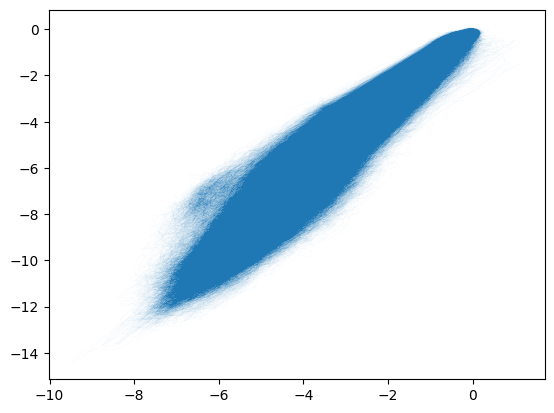

In [26]:
plt.plot(unmixed[:,0,0],unmixed[:,0,1],lw=0.01)

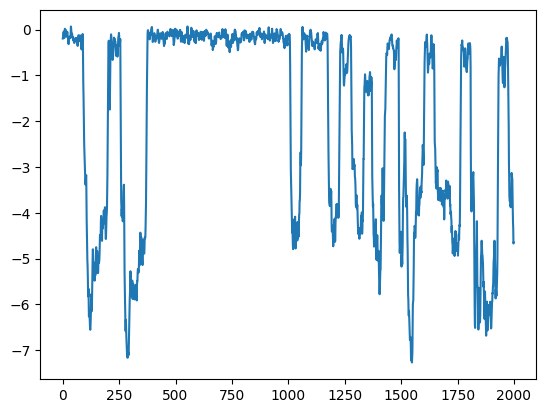

In [27]:
plt.plot(unmixed[2000:4000,0,0])